In [1]:
import mysql.connector as connector
import pandas as pd
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
pw = os.getenv('mysql_pw')

connection = connector.connect(
    user= 'root',
    host= 'localhost',
    port=3306,
    password=pw,
    database='nba_traditional'
)

In [3]:
# 'top_50_rankings' is a view created in 'top_50_rank_view.sql'
read_table_query = """SELECT * FROM top_50_rankings"""

In [4]:
# Create the dataframe from the view
df = pd.read_sql(sql=read_table_query, con=connection)
df

/var/folders/tk/flq44w5n6xx_yrgrx28btsm00000gn/T/ipykernel_4916/4123041798.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=read_table_query, con=connection)


,team_abbrev,player_name,pts,fgm,ast,reb,pts_rank,fgm_rank,ast_rank,reb_rank
0,SAC,Domantas Sabonis,1337,527,423,972,42,33,20,2
1,DEN,Nikola Jokić,2071,786,716,892,3,3,2,4
2,MIL,Giannis Antetokounmpo,2036,793,433,798,4,2,16,6
3,HOU,Alperen Sengun,1451,567,372,786,27,21,31,8
4,MIA,Bam Adebayo,1410,540,337,749,32,27,46,10
5,BOS,Jayson Tatum,1932,662,431,623,5,6,17,17
6,LAL,LeBron James,1710,651,575,546,15,9,7,25
7,LAC,James Harden,1802,531,687,456,10,30,3,45
8,MIN,Anthony Edwards,2177,721,359,450,2,4,38,47


In [5]:
# Set the index of the dataframe to the player name
df.set_index('player_name', inplace=True)

<Axes: title={'center': 'NBA Stats'}, xlabel='Players', ylabel='Ranks'>

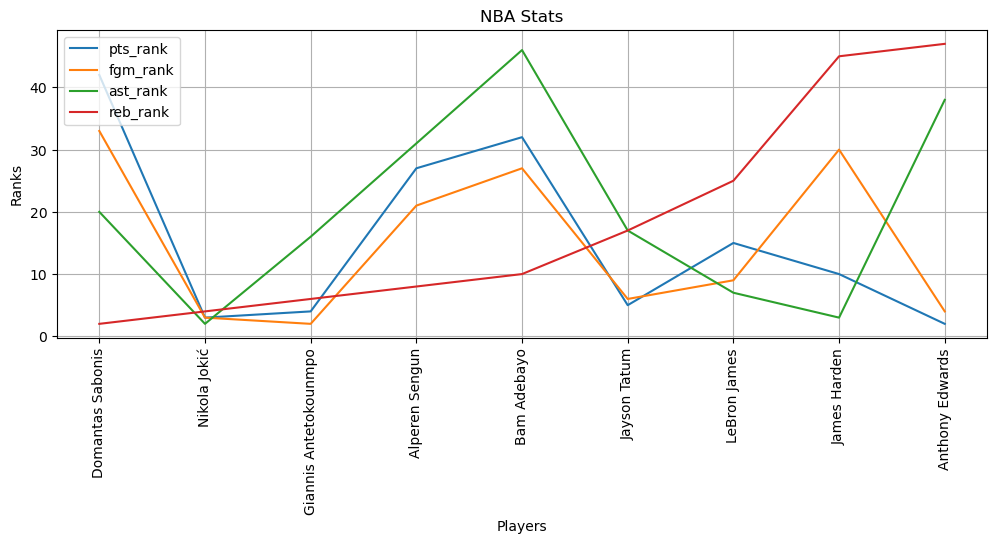

In [6]:
# Create a line graph to illustrate player metrics (lower is the higher ranking ie. Rank 1,2 etc.)
df[['pts_rank', 'fgm_rank', 'ast_rank', 'reb_rank']].plot(kind='line', title='NBA Stats', 
                                                          xlabel='Players', 
                                                          ylabel='Ranks', 
                                                          figsize=(12,4),
                                                          grid=True,
                                                          rot=90)